In [2]:
%matplotlib inline 
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 24 23:33:42 2016

@author: tyfal
"""
import numpy as np
import pandas as pd
import pylab, quandl
import matplotlib.pyplot as plt


class Reg:
    
    
    def ols_estimate(self, x, series_x, series_y):
        
        #dataframe from series'
        df = ({'serx':pd.Series(series_x), 'sery':pd.Series(series_y)})
        
        #b1
        b1 = np.corrcoef(df['serx'], df['sery'])[0,1]
        
        #b0
        b0 = np.mean(df['sery']) - b1*np.mean(df['serx'])            
        
        #making prediction
        y = b0 + b1*x
        
        return y
        
        
    def r_squared(self, series_x, series_y):
        
        #dataframe from series'
        df = ({'serx':pd.Series(series_x), 'sery':pd.Series(series_y)})
        
        #b1
        b1 = np.corrcoef(df['serx'], df['sery'])[0,1]
        
        #R**2
        r_squared = b1**2
        
        return r_squared
        
        
    def plot(self, series_x, series_y):
        
        #dtaframe from series'
        df = ({'serx':pd.Series(series_x), 'sery':pd.Series(series_y)})
        
        #regression line
        estimates = []
        [estimates.append(self.ols_estimate(x, df['serx'], 
                         df['sery'])) for x in range(int(round(min(df['serx']),0)),
                         int(round(max(df['serx']),0)))]
        
        #plot scatter
        plt.figure()
        plt.subplot(111)
        plt.scatter(df['serx'], df['sery'], s=10, label=df.keys())
        
        #plot regression
        plt.plot(range(int(round(min(df['serx']),0)),
                       int(round(max(df['serx']),0))),
                 estimates, color='r', lw=2,
                 label='r-squared: {}'.format(round(self.r_squared(series_x, 
                                              series_y),2)))
        
        #format plot
        plt.legend()
        plt.grid()

        pylab.show()
        
#firgure out how to get column names in legend
#publish current in ipynb
#hypothesis testing

reg = Reg()


In [4]:
AMZN = quandl.get("XNAS/AMZN", authtoken="zo7kqTM5GbbuJUNsTKVa",
                    trim_start="2011-1-1",trim_end="2011-12-1")

EBAY = quandl.get("YAHOO/EBAY", authtoken="zo7kqTM5GbbuJUNsTKVa",
                    trim_start="2011-1-1",trim_end="2011-12-1")


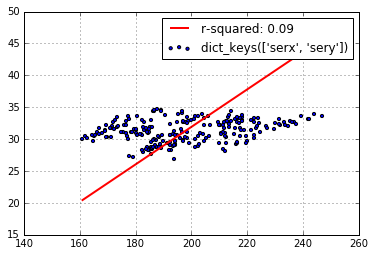

In [6]:
reg.plot(AMZN['Close'], EBAY['Close'])